## Import Libraries

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [3]:
df = pd.read_csv('int_prof.csv')
df.head()

,Logical_quotient_rating,hackathons,coding_skills_rating,public_speaking_points,self_learning_capability,Extra_courses_did,certifications,workshops,reading_and_writing_skills,memory_capability_score,Interested_subjects,interested_career_area,Type_of_company_want_to_settle_in,Taken_inputs_from_seniors_or_elders,Interested_Type_of_Books,Management_or_Technical,hard_smart_worker,worked_in_teams_ever,Introvert,Suggested_Job_Role
0,5,0,6,2,yes,no,information security,testing,poor,poor,programming,testing,BPA,no,Series,Management,smart worker,yes,no,Applications Developer
1,7,6,4,3,no,yes,shell programming,testing,excellent,medium,Management,system developer,Cloud Services,yes,Autobiographies,Technical,hard worker,no,yes,Applications Developer
2,2,3,9,1,no,yes,information security,testing,excellent,poor,data engineering,Business process analyst,product development,yes,Travel,Technical,smart worker,no,no,Applications Developer
3,2,6,3,5,no,yes,r programming,database security,excellent,poor,networks,testing,Testing and Maintainance Services,yes,Guide,Management,smart worker,yes,yes,Applications Developer
4,2,0,3,4,yes,no,distro making,game development,excellent,medium,Software Engineering,system developer,BPA,no,Health,Technical,hard worker,yes,no,Applications Developer


In [4]:
print('Shape of data is: %s entries and %s column'%(df.shape[0],df.shape[1]))

Shape of data is: 6901 entries and 20 column


## Data Preprocessing

In [5]:
print("All the columns in the dataset: " , df.columns)

All the columns in the dataset:  Index(['Logical_quotient_rating', 'hackathons', 'coding_skills_rating',
       'public_speaking_points', 'self_learning_capability',
       'Extra_courses_did', 'certifications', 'workshops',
       'reading_and_writing_skills', 'memory_capability_score',
       'Interested_subjects', 'interested_career_area',
       'Type_of_company_want_to_settle_in',
       'Taken_inputs_from_seniors_or_elders', 'Interested_Type_of_Books',
       'Management_or_Technical', 'hard_smart_worker', 'worked_in_teams_ever',
       'Introvert', 'Suggested_Job_Role'],
      dtype='object')


In [6]:
print("Numeric Columns in DF: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nCategorical Columns in DF: \n" , df.select_dtypes(include=['object']).columns.tolist())

Numeric Columns in DF: 
 ['Logical_quotient_rating', 'hackathons', 'coding_skills_rating', 'public_speaking_points']


Categorical Columns in DF: 
 ['self_learning_capability', 'Extra_courses_did', 'certifications', 'workshops', 'reading_and_writing_skills', 'memory_capability_score', 'Interested_subjects', 'interested_career_area', 'Type_of_company_want_to_settle_in', 'Taken_inputs_from_seniors_or_elders', 'Interested_Type_of_Books', 'Management_or_Technical', 'hard_smart_worker', 'worked_in_teams_ever', 'Introvert', 'Suggested_Job_Role']


### No Missing Values

In [7]:
df.isnull().sum(axis=0)

Logical_quotient_rating                0
hackathons                             0
coding_skills_rating                   0
public_speaking_points                 0
self_learning_capability               0
Extra_courses_did                      0
certifications                         0
workshops                              0
reading_and_writing_skills             0
memory_capability_score                0
Interested_subjects                    0
interested_career_area                 0
Type_of_company_want_to_settle_in      0
Taken_inputs_from_seniors_or_elders    0
Interested_Type_of_Books               0
Management_or_Technical                0
hard_smart_worker                      0
worked_in_teams_ever                   0
Introvert                              0
Suggested_Job_Role                     0
dtype: int64

### Uniques Categorical Values in DF

In [8]:
cat_col = df[['self_learning_capability', 'Extra_courses_did', 'certifications', 'workshops'
              , 'reading_and_writing_skills', 'memory_capability_score',
              'Interested_subjects', 'interested_career_area', 'Type_of_company_want_to_settle_in'
              , 'Taken_inputs_from_seniors_or_elders', 'Interested_Type_of_Books',
              'Management_or_Technical', 'hard_smart_worker', 'worked_in_teams_ever', 'Introvert', 'Suggested_Job_Role']]
for i in cat_col:
    print(df[i].value_counts(), end="\n\n")

yes    3496
no     3405
Name: self_learning_capability, dtype: int64

no     3529
yes    3372
Name: Extra_courses_did, dtype: int64

r programming           803
information security    785
machine learning        783
shell programming       783
full stack              768
hadoop                  764
python                  756
distro making           740
app development         719
Name: certifications, dtype: int64

database security    897
system designing     891
web technologies     891
hacking              867
testing              852
data science         842
game development     831
cloud computing      830
Name: workshops, dtype: int64

excellent    2328
medium       2315
poor         2258
Name: reading_and_writing_skills, dtype: int64

medium       2317
excellent    2303
poor         2281
Name: memory_capability_score, dtype: int64

Software Engineering     731
IOT                      722
cloud computing          721
programming              716
networks                 713
Co

- By using binary encoding, categorical features with yes or no can be easily converted to numerical values.

### To check data variety in Interested Type of Books columns

<AxesSubplot:xlabel='Interested_Type_of_Books', ylabel='count'>

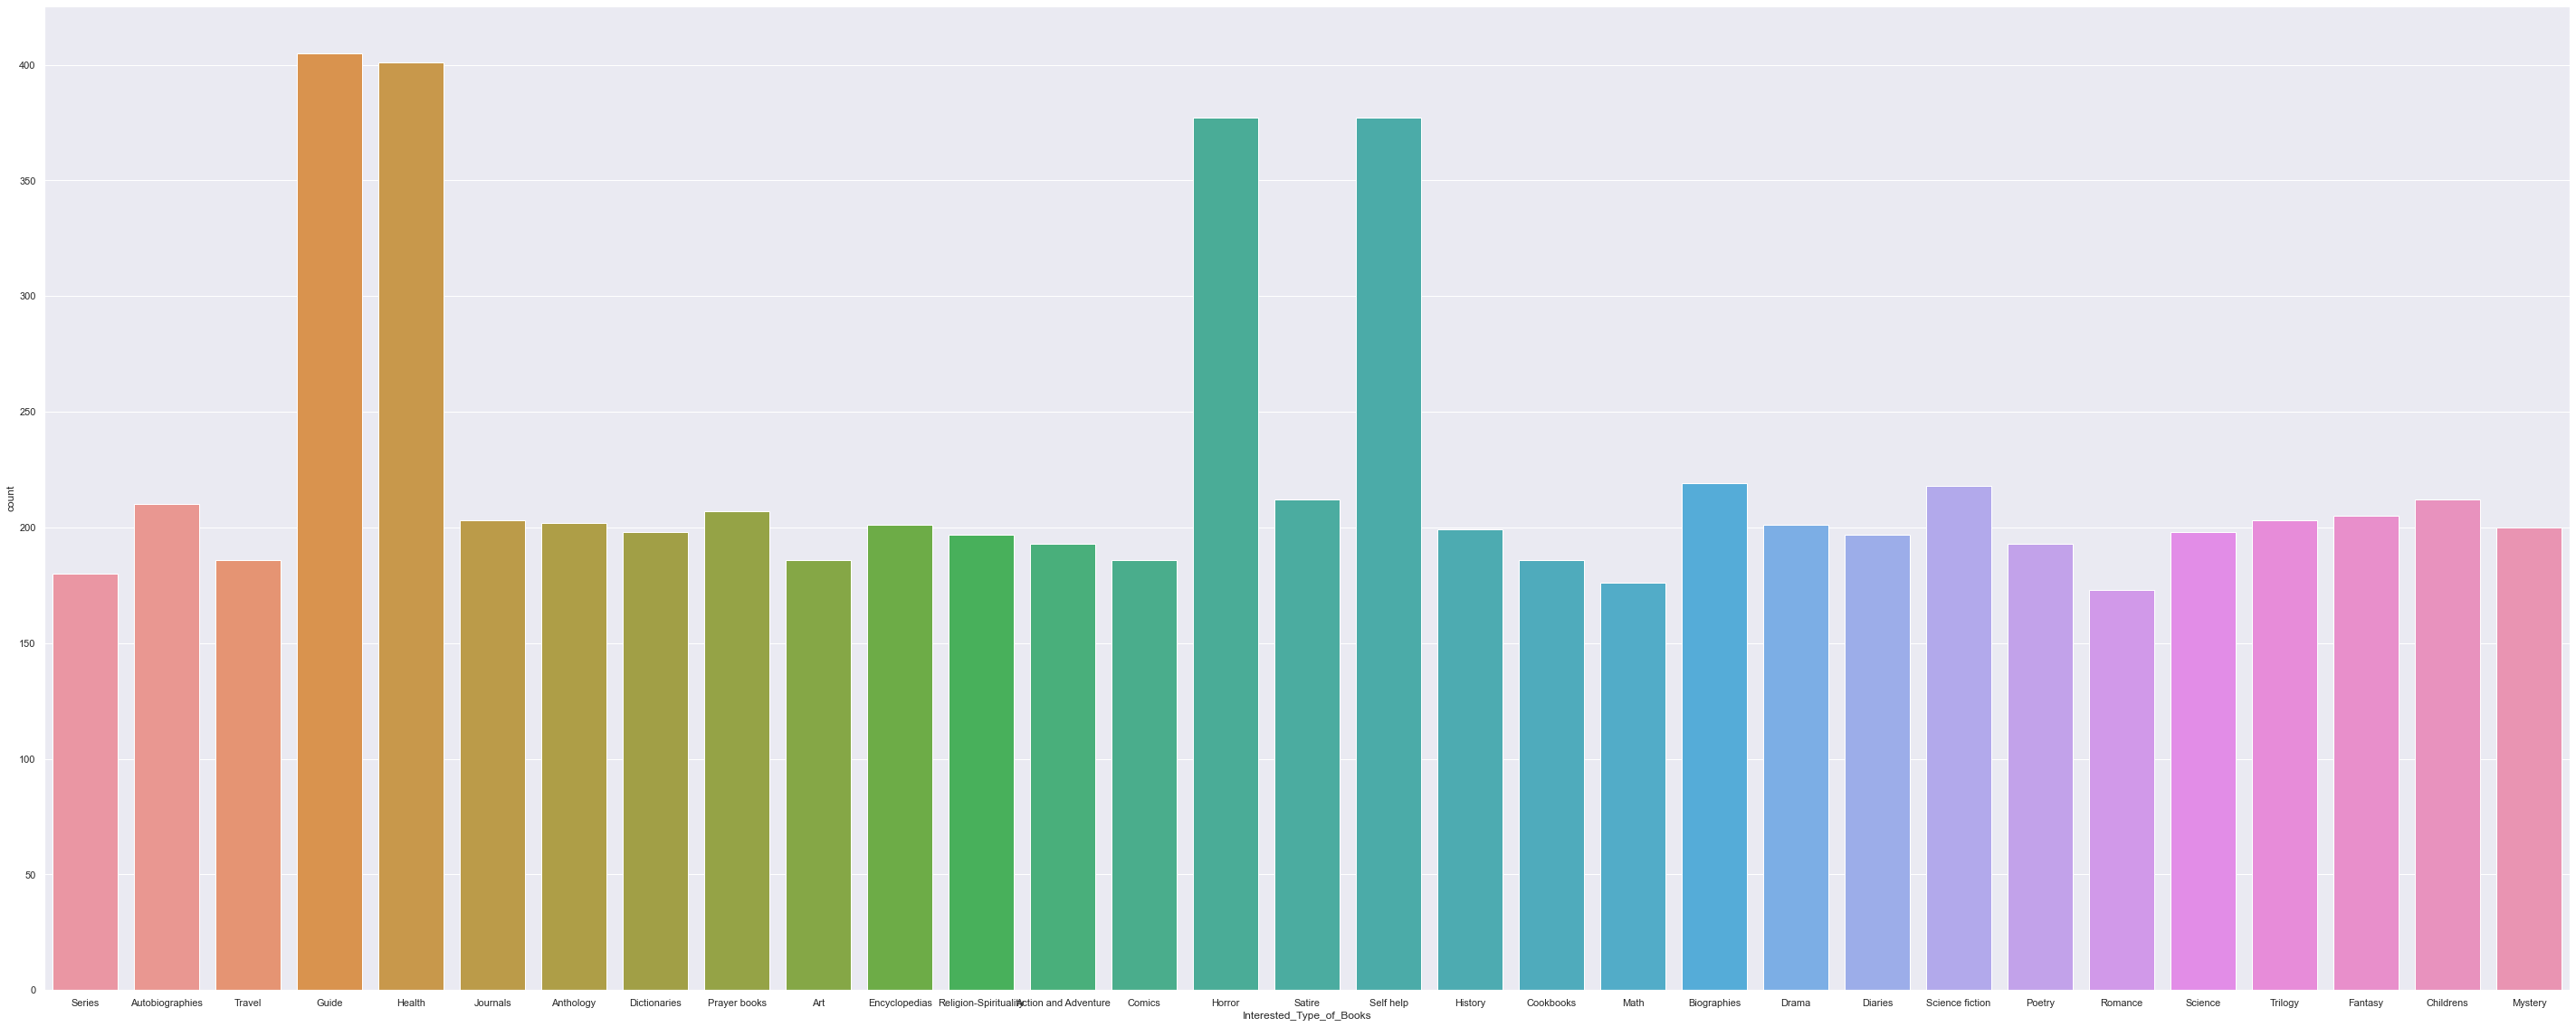

In [9]:
sns.set(rc={'figure.figsize':(50,20)})
sns.countplot(x = df["Interested_Type_of_Books"])

## EDA

### Corr Between Numerical Columns

<AxesSubplot:>

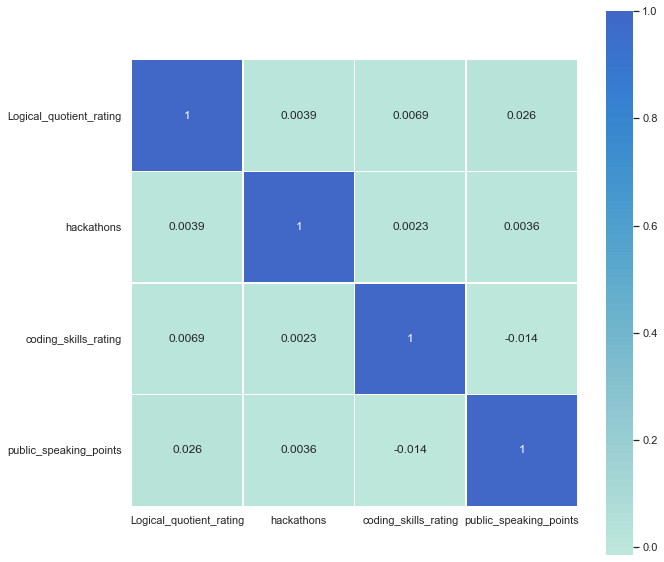

In [10]:
corr = df[['Logical_quotient_rating', 'hackathons', 
           'coding_skills_rating', 'public_speaking_points']].corr()
f,axes = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(corr,square=True,annot = True,linewidth = .4,center = 2,ax = axes)

## Visualization for Categorical Values

In [11]:
print(df["Interested_subjects"].value_counts())

Software Engineering     731
IOT                      722
cloud computing          721
programming              716
networks                 713
Computer Architecture    703
data engineering         672
hacking                  663
Management               644
parallel computing       616
Name: Interested_subjects, dtype: int64


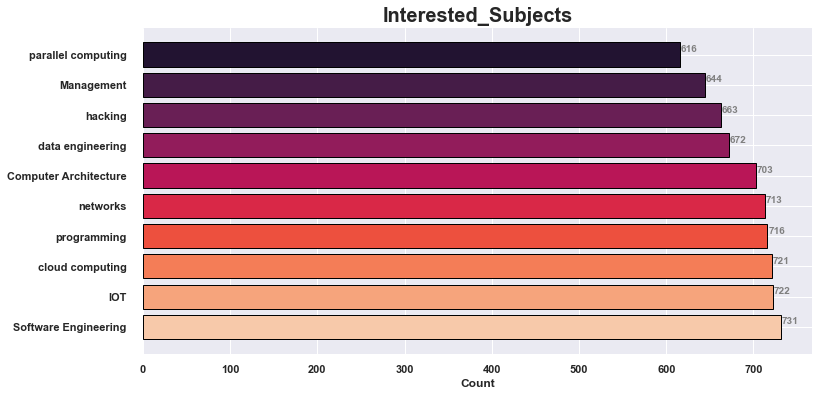

In [12]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df["Interested_subjects"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('rocket_r',len(title_cnt)))

# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
#ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested_Subjects',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [13]:
print(df["Interested_Type_of_Books"].value_counts())

Guide                    405
Health                   401
Self help                377
Horror                   377
Biographies              219
Science fiction          218
Satire                   212
Childrens                212
Autobiographies          210
Prayer books             207
Fantasy                  205
Journals                 203
Trilogy                  203
Anthology                202
Encyclopedias            201
Drama                    201
Mystery                  200
History                  199
Science                  198
Dictionaries             198
Diaries                  197
Religion-Spirituality    197
Poetry                   193
Action and Adventure     193
Comics                   186
Art                      186
Travel                   186
Cookbooks                186
Series                   180
Math                     176
Romance                  173
Name: Interested_Type_of_Books, dtype: int64


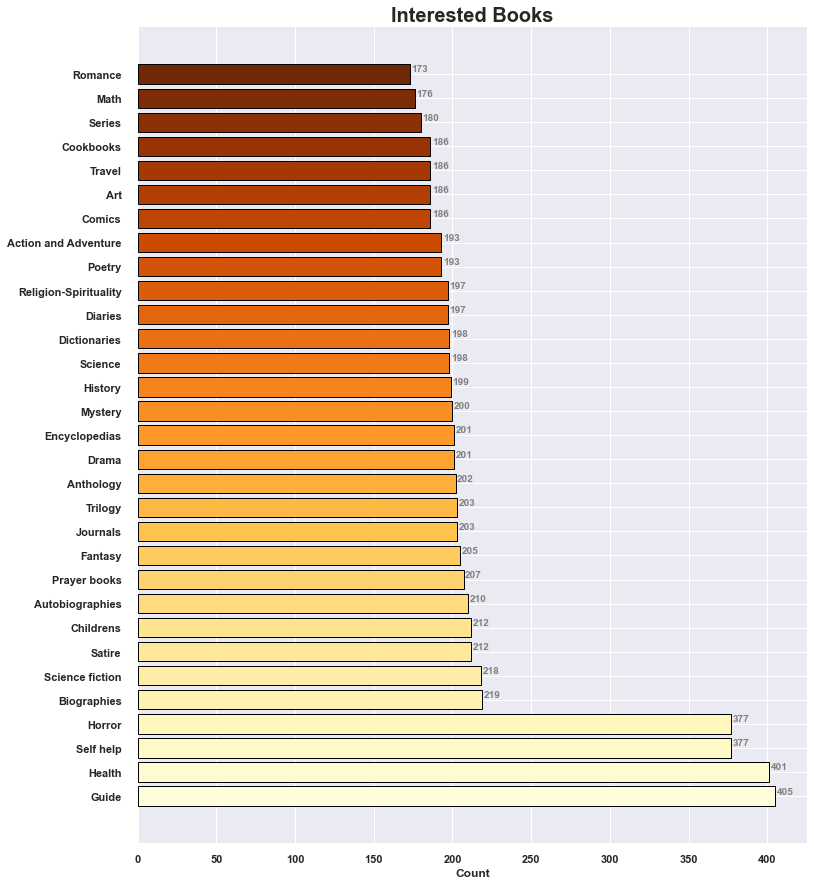

In [14]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,15))

# Horizontal Bar Plot
title_cnt=df["Interested_Type_of_Books"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('YlOrBr',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
#ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Books',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [15]:
print(df["certifications"].value_counts())

r programming           803
information security    785
machine learning        783
shell programming       783
full stack              768
hadoop                  764
python                  756
distro making           740
app development         719
Name: certifications, dtype: int64


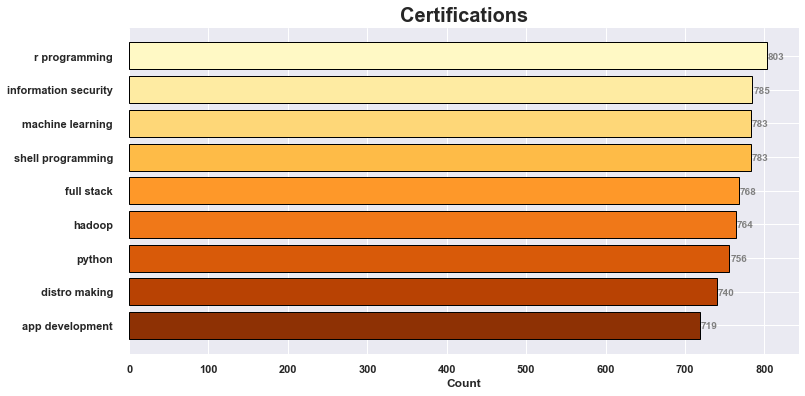

In [16]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df.certifications.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('YlOrBr',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Certifications',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [17]:
print(df["workshops"].value_counts())

database security    897
system designing     891
web technologies     891
hacking              867
testing              852
data science         842
game development     831
cloud computing      830
Name: workshops, dtype: int64


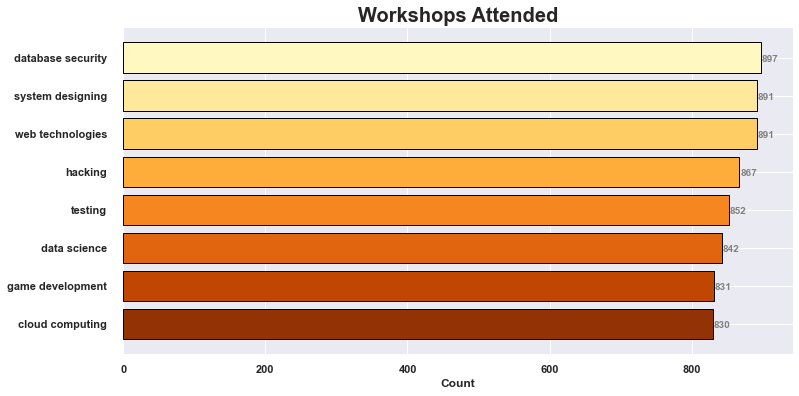

In [18]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df.workshops.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('YlOrBr',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Workshops Attended',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [19]:
print(df["Type_of_company_want_to_settle_in"].value_counts())

Service Based                        725
Web Services                         719
BPA                                  711
Testing and Maintainance Services    698
Product based                        695
Finance                              694
Cloud Services                       692
product development                  669
Sales and Marketing                  658
SAaS services                        640
Name: Type_of_company_want_to_settle_in, dtype: int64


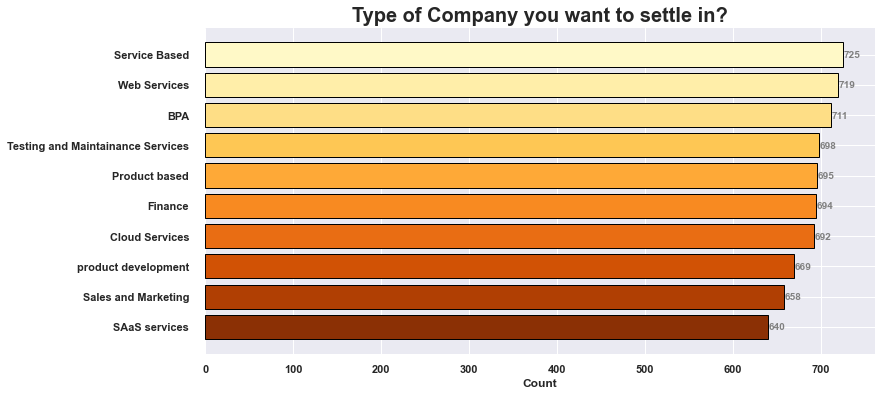

In [20]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df["Type_of_company_want_to_settle_in"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('YlOrBr',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Type of Company you want to settle in?',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [21]:
print(df["interested_career_area"].value_counts())

system developer            1178
security                    1177
Business process analyst    1154
developer                   1145
testing                     1128
cloud computing             1119
Name: interested_career_area, dtype: int64


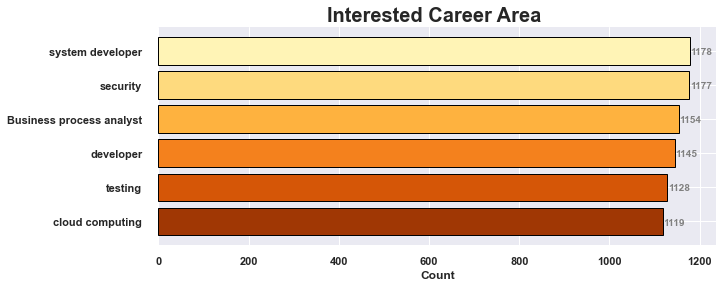

In [22]:
# Figure Size
fig, ax = plt.subplots(figsize=(10,4)) #width,height

# Horizontal Bar Plot
title_cnt=df["interested_career_area"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('YlOrBr',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Career Area ',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

### Checking to see balance in the target variable

<AxesSubplot:xlabel='Suggested_Job_Role', ylabel='count'>

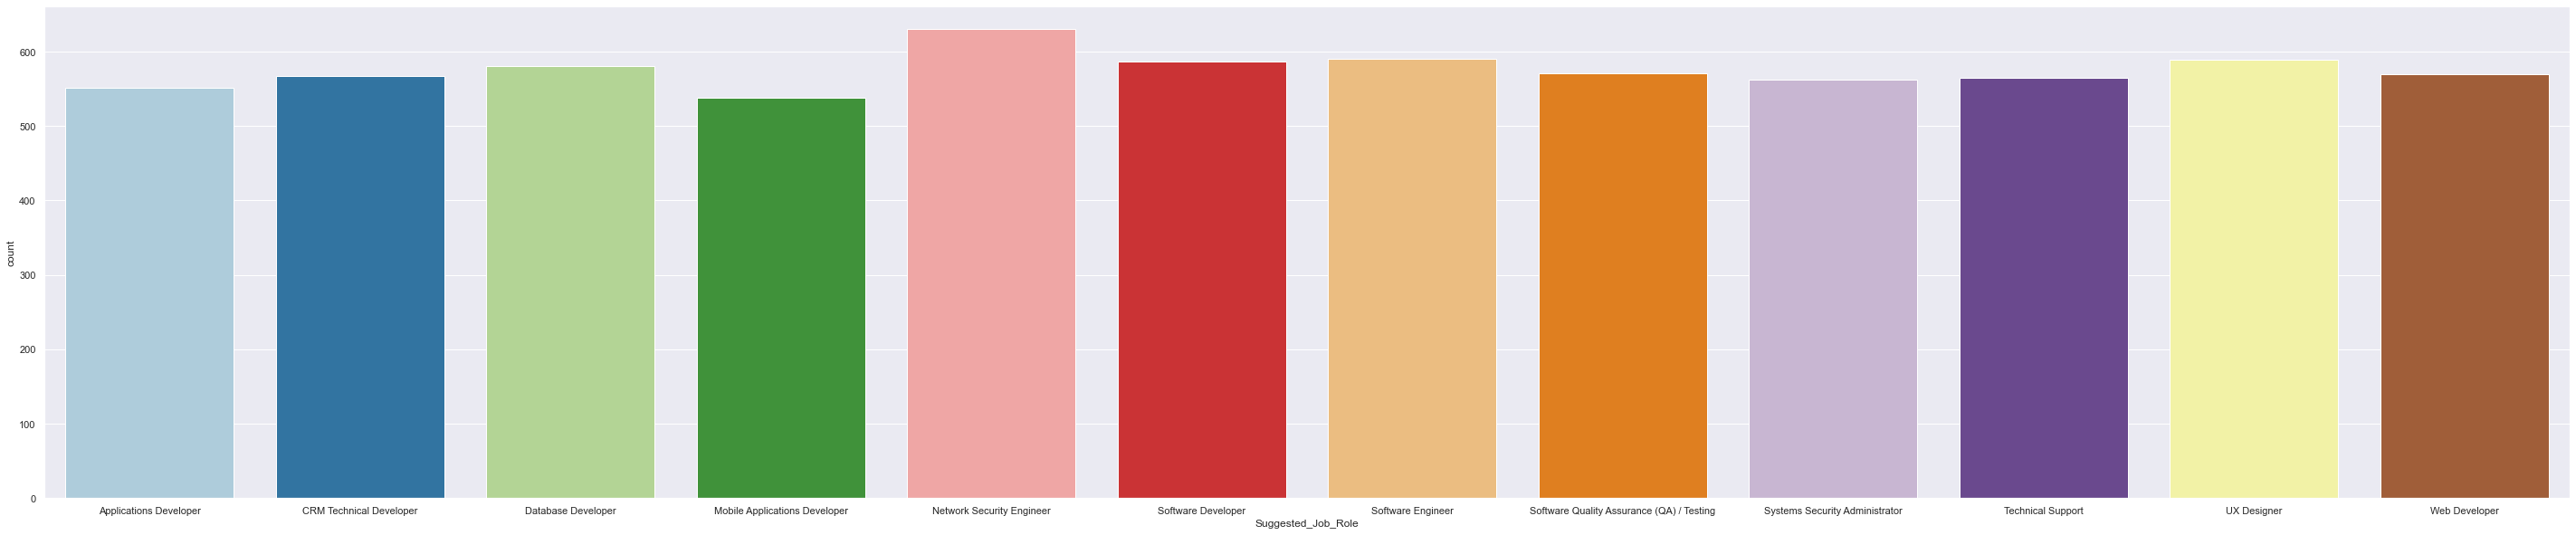

In [23]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = df["Suggested_Job_Role"], palette="Paired")

##  Feature Selection & Engineering

### Binary Encoding for Categorical Variables

In [24]:
cols = df[["self_learning_capability","Extra_courses_did","Taken_inputs_from_seniors_or_elders", "worked_in_teams_ever",
           "Introvert"]]
for i in cols:
    cleanup_nums = {i: {"yes": 1, "no": 0}}
    df = df.replace(cleanup_nums)

In [25]:
print("\n\n Categorical Values: \n" , df.select_dtypes(include=['object']).columns.tolist())



 Categorical Values: 
 ['certifications', 'workshops', 'reading_and_writing_skills', 'memory_capability_score', 'Interested_subjects', 'interested_career_area', 'Type_of_company_want_to_settle_in', 'Interested_Type_of_Books', 'Management_or_Technical', 'hard_smart_worker', 'Suggested_Job_Role']


### One Hot Encoding For Categorical values

In [26]:
mycol = df[["reading_and_writing_skills", "memory_capability_score"]]
for i in mycol:
    cleanup_nums = {i: {"poor": 0, "medium": 1, "excellent": 2}}
    df = df.replace(cleanup_nums)

cat_col = df[['certifications', 'workshops', 'Interested_subjects', 'interested_career_area',
              'Type_of_company_want_to_settle_in', 
                    'Interested_Type_of_Books']]
for i in cat_col:
    df[i] = df[i].astype('category')
    df[i + "_code"] = df[i].cat.codes

print("\n\nList of Categorical values: \n" , df.select_dtypes(include=['object']).columns.tolist())



List of Categorical values: 
 ['Management_or_Technical', 'hard_smart_worker', 'Suggested_Job_Role']


In [27]:
df.head(5)

,Logical_quotient_rating,hackathons,coding_skills_rating,public_speaking_points,self_learning_capability,Extra_courses_did,certifications,workshops,reading_and_writing_skills,memory_capability_score,...,hard_smart_worker,worked_in_teams_ever,Introvert,Suggested_Job_Role,certifications_code,workshops_code,Interested_subjects_code,interested_career_area_code,Type_of_company_want_to_settle_in_code,Interested_Type_of_Books_code
0,5,0,6,2,1,0,information security,testing,0,0,...,smart worker,1,0,Applications Developer,4,6,9,5,0,28
1,7,6,4,3,0,1,shell programming,testing,2,1,...,hard worker,0,1,Applications Developer,8,6,2,4,1,3
2,2,3,9,1,0,1,information security,testing,2,0,...,smart worker,0,0,Applications Developer,4,6,5,0,9,29
3,2,6,3,5,0,1,r programming,database security,2,0,...,smart worker,1,1,Applications Developer,7,2,7,5,7,13
4,2,0,3,4,1,0,distro making,game development,2,1,...,hard worker,1,0,Applications Developer,1,3,3,4,0,14


###  DV Encoding

In [28]:
print(df['Management_or_Technical'].unique())
print(df['hard_smart_worker'].unique())

['Management' 'Technical']
['smart worker' 'hard worker']


In [29]:
df = pd.get_dummies(df, columns=["Management_or_Technical", "hard_smart_worker"], prefix=["A", "B"])
df.head()

,Logical_quotient_rating,hackathons,coding_skills_rating,public_speaking_points,self_learning_capability,Extra_courses_did,certifications,workshops,reading_and_writing_skills,memory_capability_score,...,certifications_code,workshops_code,Interested_subjects_code,interested_career_area_code,Type_of_company_want_to_settle_in_code,Interested_Type_of_Books_code,A_Management,A_Technical,B_hard worker,B_smart worker
0,5,0,6,2,1,0,information security,testing,0,0,...,4,6,9,5,0,28,1,0,0,1
1,7,6,4,3,0,1,shell programming,testing,2,1,...,8,6,2,4,1,3,0,1,1,0
2,2,3,9,1,0,1,information security,testing,2,0,...,4,6,5,0,9,29,0,1,0,1
3,2,6,3,5,0,1,r programming,database security,2,0,...,7,2,7,5,7,13,1,0,0,1
4,2,0,3,4,1,0,distro making,game development,2,1,...,1,3,3,4,0,14,0,1,1,0


In [30]:
df.rename(columns = {'B_hard worker':'B_hard_worker'}, inplace = True)
df.rename(columns = {'B_smart worker':'B_smart_worker'}, inplace = True)

In [31]:
df.head()

,Logical_quotient_rating,hackathons,coding_skills_rating,public_speaking_points,self_learning_capability,Extra_courses_did,certifications,workshops,reading_and_writing_skills,memory_capability_score,...,certifications_code,workshops_code,Interested_subjects_code,interested_career_area_code,Type_of_company_want_to_settle_in_code,Interested_Type_of_Books_code,A_Management,A_Technical,B_hard_worker,B_smart_worker
0,5,0,6,2,1,0,information security,testing,0,0,...,4,6,9,5,0,28,1,0,0,1
1,7,6,4,3,0,1,shell programming,testing,2,1,...,8,6,2,4,1,3,0,1,1,0
2,2,3,9,1,0,1,information security,testing,2,0,...,4,6,5,0,9,29,0,1,0,1
3,2,6,3,5,0,1,r programming,database security,2,0,...,7,2,7,5,7,13,1,0,0,1
4,2,0,3,4,1,0,distro making,game development,2,1,...,1,3,3,4,0,14,0,1,1,0


In [32]:
df.to_csv("files_to_test.csv")

In [33]:
print("List of Numerical values: \n" , df.select_dtypes(include=np.number).columns.tolist())

List of Numerical values: 
 ['Logical_quotient_rating', 'hackathons', 'coding_skills_rating', 'public_speaking_points', 'self_learning_capability', 'Extra_courses_did', 'reading_and_writing_skills', 'memory_capability_score', 'Taken_inputs_from_seniors_or_elders', 'worked_in_teams_ever', 'Introvert', 'certifications_code', 'workshops_code', 'Interested_subjects_code', 'interested_career_area_code', 'Type_of_company_want_to_settle_in_code', 'Interested_Type_of_Books_code', 'A_Management', 'A_Technical', 'B_hard_worker', 'B_smart_worker']


## Machine Learning Models to get best accuracy

In [34]:
feed = df[['Logical_quotient_rating', 'coding_skills_rating', 'hackathons', 'public_speaking_points',
           'self_learning_capability','Extra_courses_did', 
           'Taken_inputs_from_seniors_or_elders', 'worked_in_teams_ever', 'Introvert', 'reading_and_writing_skills',
           'memory_capability_score',  
           'B_hard_worker', 'B_smart_worker', 'A_Management', 'A_Technical', 'Interested_subjects_code', 
           'Interested_Type_of_Books_code', 'certifications_code', 
           'workshops_code', 'Type_of_company_want_to_settle_in_code',  'interested_career_area_code',
             'Suggested_Job_Role']]

# Choosing independent vars
df_train_x = feed.drop('Suggested_Job_Role',axis = 1)

# Choosing all target vars
df_train_y = feed['Suggested_Job_Role']

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.10, random_state=42)


In [35]:
y_train = pd.DataFrame(y_train, columns = ["Suggested_Job_Role"])
y_train.head()
y_test = pd.DataFrame(y_test, columns = ["Suggested_Job_Role"])
y_test

,Suggested_Job_Role
611,CRM Technical Developer
6417,Web Developer
3352,Software Developer
4224,Software Quality Assurance (QA) / Testing
3102,Software Developer
...,...
4151,Software Quality Assurance (QA) / Testing
1426,Database Developer
3193,Software Developer
6258,UX Designer


### 1. Decision Tree


In [36]:
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*10)

confusion matrics= [[ 4  5  3  4  6  4  8  3  6  4  8  8]
 [ 4  3  5  6  1  7  7  6  2  7  3  4]
 [ 6  6 10  8  6  5  1  4  3  2  5  6]
 [ 5  5  4  5  5  2  4  4  4  2  6  4]
 [ 2  8  6  8  8  6  4  6  4 10  8  7]
 [ 7  8  3  3  7  7  2  4  6  3  4  5]
 [ 4  6  7  2  6  4  5  6  3  6  5  4]
 [ 7  1  6  5  1  3  8  2  4  1  3  4]
 [ 5  7  7  4  3  6  3  5  2  1  5  8]
 [ 3  5  3  5  4  7  3  6  4  3  5  1]
 [ 3  8  3  3  7  1  1 11  4  4  6  7]
 [ 4  6  8  3  9  4  2  5  4  2  5  7]]
  
accuracy= 0.8972503617945007


### Data for single instance prediction

In [37]:
userdata = [['7','6','6','8','3','5','4', '4', '7', '3', '3', '6','8', 
                    '7','5','7','4','5','6','8','8']]
ynewclass = dtree.predict(userdata)
ynew = dtree.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['Software Developer']
Probabilities of all classes:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Probability of Predicted class :  1.0


### 2. Supprt Vector Machine (SVM)

In [38]:
from sklearn.svm import SVC

In [39]:
svm = svm.SVC()
svm.fit(x_train, y_train)
svm_y_pred = svm.predict(x_test)
svm_cm = confusion_matrix(y_test,svm_y_pred)
svm_accuracy = accuracy_score(y_test,svm_y_pred)
print("confusion matrics=",svm_cm)
print("  ")
print("accuracy=",svm_accuracy*10)

confusion matrics= [[ 3  3  0  0 17  8  3  6  9  5  7  2]
 [ 3  2  1  0 13  4  5 11  2  4  7  3]
 [ 2  2  2  0 12 10 10  7  6  6  5  0]
 [ 2  0  1  0 14  8  6  6  3  7  3  0]
 [ 2  2  2  1 20  9  7 14  2 11  5  2]
 [ 2  4  0  0 17  6  6 13  5  5  1  0]
 [ 4  1  1  1 17  6  3 13  3  4  4  1]
 [ 2  4  0  0 12  5  9  5  1  5  2  0]
 [ 1  4  0  0 18  7  8  6  1  6  2  3]
 [ 0  2  0  0 15  7  6  7  3  6  2  1]
 [ 3  1  1  0 11 14  6  9  3  5  4  1]
 [ 2  7  1  0 15  7  5  7  8  2  3  2]]
  
accuracy= 0.7814761215629522


In [40]:
ynewclass = svm.predict(userdata)
ynew = svm.decision_function(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['Mobile Applications Developer']
Probabilities of all classes:  [[ 1.73041176  8.24915687  0.71768582 10.27662838  0.72768304  4.83081212
  10.27058316 10.25823028  1.74843059  6.20707485  7.25684391  3.76911874]]
Probability of Predicted class :  10.276628381649312


### 3. Random Forest Classifier

In [41]:
rf = RandomForestClassifier(random_state = 10)
rf.fit(x_train, y_train)
rfc_y_pred = rf.predict(x_test)
rfc_cm = confusion_matrix(y_test,rfc_y_pred)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred)
print("confusion matrics=",rfc_cm)
print("  ")
print("accuracy=",rfc_accuracy*10)

confusion matrics= [[ 5  2  9  3  3  6  8  8  5  4  2  8]
 [ 4  5  3  2 12  4  5  7  2  4  3  4]
 [ 7  6  4  4  6  3  7  5  5  7  3  5]
 [ 6 10  3  3  7  2  3  6  3  4  2  1]
 [ 4  5  6  3  6  8 10  8  4  8  7  8]
 [ 8  5  4  4  3  4  7  5  4  3  8  4]
 [ 5  4  5  6 10  5  3  5  3  6  3  3]
 [ 4  3  3  4  6  2  4  5  2  1  5  6]
 [ 4  2  5  6  7  6  5  3  3  4  7  4]
 [ 4  9  7  1  4  7  2  2  2  2  6  3]
 [ 7  5  5  2  5  5  4  5  7  4  7  2]
 [ 3  5  6  4  4  6  4  7  5  4  4  7]]
  
accuracy= 0.7814761215629522


In [42]:
ynewclass = rf.predict(userdata)
ynew = rf.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['Database Developer']
Probabilities of all classes:  [[0.02 0.08 0.12 0.07 0.09 0.07 0.07 0.11 0.07 0.1  0.09 0.11]]
Probability of Predicted class :  0.12


### 4. XGBOOST

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42, learning_rate=0.02, n_estimators=300)
xgb.fit(X = x_train,y =  y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.02, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = xgb.predict(x_test)
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(y_test, y_pred)
xgb_accuracy = accuracy_score(y_test, y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",xgb_accuracy*10)

confusion matrics= [[ 5  5  6  4  4  8  5  1  5  4  8  8]
 [10  6  6  5  4  5  5  0  5  3  2  4]
 [ 5  4  6  4  5  5  6  4  4  7  4  8]
 [ 6  3  3  1  5  7  2  7  6  2  4  4]
 [ 5  5  8  6  9  4  7  3  7  9  5  9]
 [ 5  8  4  4  3  7  2  5  4  9  4  4]
 [ 6  3  7  3  7  4  2  4  7  6  6  3]
 [ 2  5  7  1  7  1  2  4  4  4  5  3]
 [ 2  5  5  3  6  7  6  4  3  3  6  6]
 [ 1  4  4  1  7  7  4  5  6  4  2  4]
 [ 6  6  9  3  6  6  3  7  2  2  5  3]
 [ 4  3 10  4  5  6  3  4  5  4  3  8]]
  
accuracy= 0.8683068017366136


### 5. K-Nearest Neighbours

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [37]:
knn_accuracy = accuracy_score(y_test, y_pred)
print("accuracy = ", knn_accuracy*10)
knn_classification_report = classification_report(y_test, y_pred)
print("Classification Report: \n" , knn_classification_report)
knn_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", knn_cm)

accuracy =  0.9551374819102749
Classification Report: 
                                            precision    recall  f1-score   support

                   Applications Developer       0.14      0.21      0.17        63
                  CRM Technical Developer       0.06      0.11      0.08        55
                       Database Developer       0.11      0.15      0.12        62
            Mobile Applications Developer       0.11      0.12      0.12        50
                Network Security Engineer       0.12      0.12      0.12        77
                       Software Developer       0.04      0.03      0.04        59
                        Software Engineer       0.09      0.07      0.08        58
Software Quality Assurance (QA) / Testing       0.06      0.07      0.06        45
           Systems Security Administrator       0.17      0.14      0.16        56
                        Technical Support       0.03      0.02      0.02        49
                              

### 6. Naive Bayes

In [38]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
gnb_accuracy = accuracy_score(y_test, y_pred)
print("accuracy = ", gnb_accuracy*10)
gnb_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", gnb_cm)

accuracy =  0.8972503617945007
Confusion Matrix:  [[ 5  3  6  3 10  3  3 11  6  7  5  1]
 [ 7  5  5  3  7  1  6  8  0  7  3  3]
 [ 3  4  3  2  4  3 12 10  3  7  5  6]
 [ 1  2  5  3  5  3  8  5  4  8  5  1]
 [ 6  8  8  2 10  5  9  8  7 11  3  0]
 [ 3  4  3  1 12  1  6 10  5  9  3  2]
 [ 8  5  3  5  6  3  6 12  2  3  5  0]
 [ 3  6  2  0  4  1 10  7  3  5  2  2]
 [ 4  2  5  0 10  4  6  9  7  6  1  2]
 [ 0  2  4  1  7  5  1 13  5  9  1  1]
 [ 6  7  2  0  6  5 10  9  2  7  4  0]
 [ 3  5  7  3  9  5  7  8  6  1  3  2]]


## The Best Accuracy with a 90/10 split is given by the KNN Model.

In [49]:
import pickle 
pickle.dump(dtree,open('predict.pkl','wb'))

In [50]:
# from flask import Flask, request, render_template
# from flask_cors import cross_origin
# import sklearn
# import pickle
# import pandas as pd


# app = Flask(__name__)
# model = pickle.load(open("predict.pkl", "rb"))

# prediction=model.predict([[
# '7','6','6','8','3','5','4', '4', '7', '3', '3', '6','8', 
#                     '7','5','7','4','5','6','8','8'
            
#         ]])
# output=(prediction[0],2)
# print(output)

In [ ]:
from flask import Flask, request, render_template
from flask_cors import cross_origin
import sklearn
import pickle
import pandas as pd


app = Flask(__name__)
model = pickle.load(open("predict.pkl", "rb"))


@app.route("/")
@cross_origin()
def home():
    return render_template("home.html")

@app.route("/predict", methods = ["GET", "POST"])
@cross_origin()
def predict():
    if request.method == "POST":       

 ###################   Logical_quotient_rating   #################################        
        Logical_quotient_rating = request.form["Logical_quotient_rating"]
        if (Logical_quotient_rating == 1):
            Logical_quotient_rating = 1

        
        elif (Logical_quotient_rating == 2):
            Logical_quotient_rating = 2
        elif (Logical_quotient_rating == 3):
            Logical_quotient_rating = 3
        elif (Logical_quotient_rating == 4):
            Logical_quotient_rating = 4
        elif (Logical_quotient_rating == 5):
            Logical_quotient_rating = 5
        elif (Logical_quotient_rating == 6):
            Logical_quotient_rating = 6
        elif (Logical_quotient_rating == 7):
            Logical_quotient_rating = 7
        elif (Logical_quotient_rating == 8):
            Logical_quotient_rating = 8
        elif (Logical_quotient_rating == 9):
            Logical_quotient_rating = 9           


        else:
            Logical_quotient_rating = 0
            
 ###################   hackathons   #################################            

        hackathons = request.form["hackathons"]
        if (hackathons == 1):
            hackathons = 1

        
        elif (hackathons == 2):
            hackathons = 2
        elif (hackathons == 3):
            hackathons = 3
        elif (hackathons == 4):
            hackathons = 4
        elif (hackathons == 5):
            hackathons = 5
        elif (hackathons == 6):
            hackathons = 6      
        else:
            Logical_quotient_rating = 0     
            
 ###################   coding_skills_rating   #################################                    

        coding_skills_rating = request.form["coding_skills_rating"]
        if (coding_skills_rating == 1):
            coding_skills_rating = 1

        
        elif (coding_skills_rating == 2):
            coding_skills_rating = 2
        elif (coding_skills_rating == 3):
            coding_skills_rating = 3
        elif (coding_skills_rating == 4):
            coding_skills_rating = 4
        elif (coding_skills_rating == 5):
            coding_skills_rating = 5
        elif (coding_skills_rating == 6):
            coding_skills_rating = 6
        elif (coding_skills_rating == 7):
            coding_skills_rating = 7
        elif (coding_skills_rating == 8):
            coding_skills_rating = 8
        elif (coding_skills_rating == 9):
            coding_skills_rating = 9           


        else:
            coding_skills_rating = 0
            
 ###################   public_speaking_points   #################################                    

        public_speaking_points = request.form["public_speaking_points"]
        if (public_speaking_points == 1):
            public_speaking_points = 1

        
        elif (public_speaking_points == 2):
            public_speaking_points = 2
        elif (public_speaking_points == 3):
            public_speaking_points = 3
        elif (public_speaking_points == 4):
            public_speaking_points = 4
        elif (public_speaking_points == 5):
            public_speaking_points = 5
        elif (public_speaking_points == 6):
            public_speaking_points = 6
        elif (public_speaking_points == 7):
            public_speaking_points = 7
        elif (public_speaking_points == 8):
            public_speaking_points = 8
        elif (public_speaking_points == 9):
            public_speaking_points = 9           


        else:
            public_speaking_points = 0    
            
 ###################   self_learning_capability   #################################        
            
        self_learning_capability = request.form["self_learning_capability"]
        if (self_learning_capability == 'no'):
            self_learning_capability = 0

        
        elif (self_learning_capability == 'yes'):
            self_learning_capability = 1
        


        else:
            self_learning_capability = 0    
            
 ###################   Extra_courses_did   #################################                    
            
            
        Extra_courses_did = request.form["Extra_courses_did"]
        if (Extra_courses_did =='no' ):
            Extra_courses_did = 0

        
        elif (Extra_courses_did == 'yes'):
            Extra_courses_did = 1
                  


        else:
            Extra_courses_did = 0
            
 ###################   reading_and_writing_skills   #################################                
            
        reading_and_writing_skills = request.form["reading_and_writing_skills"]
        if (reading_and_writing_skills == 1):
            reading_and_writing_skills = 1        
        elif (reading_and_writing_skills == 2):
            reading_and_writing_skills = 2
        elif (reading_and_writing_skills == 0):
            reading_and_writing_skills = 0
                 


        else:
            reading_and_writing_skills = 0
            
 ###################   memory_capability_score   #################################               
            
        memory_capability_score = request.form["memory_capability_score"]
        if (memory_capability_score == 0):
            memory_capability_score = 0

        
        elif (memory_capability_score == 1):
            memory_capability_score = 1
        elif (memory_capability_score == 2):
            memory_capability_score = 2          


        else:
            memory_capability_score = 0  
 ###################   Taken_inputs_from_seniors_or_elders   #################################           
        Taken_inputs_from_seniors_or_elders = request.form["Taken_inputs_from_seniors_or_elders"]
        if (Taken_inputs_from_seniors_or_elders == 0):
            Taken_inputs_from_seniors_or_elders = 0
        
        elif (Taken_inputs_from_seniors_or_elders == 1):
            Taken_inputs_from_seniors_or_elders = 1     

        else:
            Taken_inputs_from_seniors_or_elders = 0 
            
###################   worked_in_teams_ever   #################################
        worked_in_teams_ever = request.form["worked_in_teams_ever"]
        if (worked_in_teams_ever == 0):
            worked_in_teams_ever = 0
        elif (worked_in_teams_ever == 1):
            worked_in_teams_ever = 1   
        else:
            worked_in_teams_ever = 0 
            
###################   certifications   #################################            
            
            
        certifications = request.form["certifications"]
        if (certifications == 'app development'):
            certifications_code = 0
        
        elif (certifications == 'distro making'):
            certifications_code = 1
            
        elif (certifications == 'full stack'):
            certifications_code = 2 

        elif (certifications == 'hadoop'):
            certifications_code = 3

        elif (certifications == 'information security'):
            certifications_code = 4

        elif (certifications == 'machine learning'):
            certifications_code = 5

        elif (certifications == 'python'):
            certifications_code = 6

        elif (certifications == 'r programming'):
            certifications_code = 7
 
        elif (certifications == 'shell programming'):
            certifications_code = 8

#         else:
#             certifications_code = 0            
            
            
 ###################   workshops   #################################         
                        
        workshops = request.form["workshops"]
        if (workshops == 'cloud computing'):
            workshops_code = 0
        
        elif (workshops == 'data science'):
            workshops_code = 1
            
        elif (workshops == 'database security'):
            workshops_code = 2 

        elif (workshops == 'game development'):
            workshops_code = 3

        elif (workshops == 'hacking'):
            workshops_code = 4

        elif (workshops == 'system designing'):
            workshops_code = 5

        elif (workshops == 'testing'):
            workshops_code = 6

        elif (workshops == 'web technologies'):
            workshops_code = 7
 

        else:
            workshops_code = 0         
            
            
 ###################   interested_subjects   #################################         
                        
        interested_subjects = request.form["interested_subjects"]
        if (interested_subjects == 'Computer Architecture'):
            Interested_subjects_code = 0
        
        elif (interested_subjects == 'IOT'):
            Interested_subjects_code = 1
            
        elif (interested_subjects == 'Management'):
            Interested_subjects_code = 2 

        elif (interested_subjects == 'Software Engineering'):
            Interested_subjects_code = 3

        elif (interested_subjects == 'cloud computing'):
            Interested_subjects_code = 4

        elif (interested_subjects == 'data engineering'):
            Interested_subjects_code = 5

        elif (interested_subjects == 'hacking'):
            Interested_subjects_code = 6

        elif (interested_subjects == 'networks'):
            Interested_subjects_code = 7
        elif (interested_subjects == 'parallel computing'):
            Interested_subjects_code = 8 
        elif (interested_subjects == 'programming'):
            Interested_subjects_code = 9
#         else:
#             Interested_subjects_code = 0   
            
###################   interested_career_area   #################################         
                        
        interested_career_area = request.form["interested_career_area"]
        if (interested_career_area == 'Business process analyst'):
            interested_career_area_code = 0
        
        elif (interested_career_area == 'cloud computing'):
            interested_career_area_code = 1
            
        elif (interested_career_area == 'developer'):
            interested_career_area_code = 2 

        elif (interested_career_area == 'security'):
            interested_career_area_code = 3

        elif (interested_career_area == 'system developer'):
            interested_career_area_code = 4

        elif (interested_career_area == 'testing'):
            interested_career_area_code = 5

#         else:
#             interested_career_area_code = 0   
            
###################   Type_of_company_want_to_settle_in   #################################         
                        
        Type_of_company_want_to_settle_in = request.form["Type_of_company_want_to_settle_in"]
        if (Type_of_company_want_to_settle_in == 'BPA'):
            Type_of_company_want_to_settle_in_code = 0
        
        elif (Type_of_company_want_to_settle_in == 'Cloud Services'):
            Type_of_company_want_to_settle_in_code = 1
            
        elif (Type_of_company_want_to_settle_in == 'Finance'):
            Type_of_company_want_to_settle_in_code = 2 

        elif (Type_of_company_want_to_settle_in == 'Product based'):
            Type_of_company_want_to_settle_in_code = 3

        elif (Type_of_company_want_to_settle_in == 'SAaS services'):
            Type_of_company_want_to_settle_in_code = 4

        elif (Type_of_company_want_to_settle_in == 'Sales and Marketing'):
            Type_of_company_want_to_settle_in_code = 5

        elif (Type_of_company_want_to_settle_in == 'Service Based'):
            Type_of_company_want_to_settle_in_code = 6

        elif (Type_of_company_want_to_settle_in == 'Testing and Maintainance Services'):
            Type_of_company_want_to_settle_in_code = 7
        elif (Type_of_company_want_to_settle_in == 'Web Services'):
            Type_of_company_want_to_settle_in_code = 8 
        elif (Type_of_company_want_to_settle_in == 'product development'):
            Type_of_company_want_to_settle_in_code = 9
        else:
            Type_of_company_want_to_settle_in_code = 0 
            
###################   Interested_Type_of_Books   #################################   
            
        Interested_Type_of_Books = request.form["Interested_Type_of_Books"]
        if (Interested_Type_of_Books == 'Autobiographies'):
            Interested_Type_of_Books_code = 3
        elif (Interested_Type_of_Books == 'Series'):
            Interested_Type_of_Books_code = 28
        
        else:
            Interested_Type_of_Books_code = 28 
            
            
###################   hard_smart_worker   #################################   
            
        hard_smart_worker = request.form["hard_smart_worker"]
        if (hard_smart_worker == 'hard worker'):
            B_hard_worker = 1
            B_smart_worker= 0
        elif (hard_smart_worker == 'smart worker'):
            B_hard_worker = 0
            B_smart_worker= 1     
        else:
            B_hard_worker = 0
            B_smart_worker= 1  
            
###################   Management_or_Technical   #################################   
            
        Management_or_Technical = request.form["Management_or_Technical"]
        if (Management_or_Technical == 'Management'):
            A_Management = 1
            A_Technical = 0
        elif (Management_or_Technical == 'Technical'):
            A_Management = 0
            A_Technical = 1   
        else:
            A_Management = 0
            A_Technical = 1   
###################   Introvert   #################################   
            
        Introvert = request.form["Introvert"]
        if (Introvert == 'no'):
            Introvert = 0
        elif (Introvert == 'yes'):
            Introvert = 1
  
        else:
             Introvert = 1             
            
################################################################################################
      
            

        prediction=model.predict([[
Logical_quotient_rating, coding_skills_rating, hackathons, public_speaking_points,
           self_learning_capability,Extra_courses_did, 
           Taken_inputs_from_seniors_or_elders, worked_in_teams_ever, Introvert, reading_and_writing_skills,
           memory_capability_score,  
           B_hard_worker,B_smart_worker, A_Management, A_Technical, Interested_subjects_code, 
           Interested_Type_of_Books_code, certifications_code, 
           workshops_code, Type_of_company_want_to_settle_in_code,  interested_career_area_code
            
        ]])

        output=(prediction[0],2)
        
        print(output)

    return render_template('home.html',prediction_text="The Course for you is. {}".format(output))


    return render_template("home.html")



if __name__ == "__main__":
     app.run(debug=True,use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Nov/2022 10:54:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Nov/2022 10:54:53] "POST /predict HTTP/1.1" 200 -


('UX Designer', 2)


127.0.0.1 - - [17/Nov/2022 10:55:44] "POST /predict HTTP/1.1" 200 -


('Systems Security Administrator', 2)


127.0.0.1 - - [17/Nov/2022 10:57:44] "POST /predict HTTP/1.1" 200 -


('Applications Developer', 2)
